In [3]:
# install machine gnostics
# recommended to run in a new virtual environment

# !pip install machinegnostics #<-- Uncomment this line to install the package

## Data Membership Test

### User Note: Understanding Gnostic Data Membership

**Data Membership**

This class determines whether a specific value can be considered a valid member of a homogeneous data sample. It calculates the precise boundaries within which new data points can be added without disrupting the sample's internal consistency.

#### Gnostic Theory Foundation

In Gnostics, "membership" is not determined by arbitrary statistical confidence levels (e.g., 95% or $3\sigma$). Instead, it is defined by the structural stability of the data's probability distribution.

1.  **Homogeneity Preservation:** A data sample is considered a single, coherent object if it is **homogeneous** (possessing a unimodal probability density). A new value is a valid "member" *if and only if* extending the sample with this value preserves that homogeneity,.
2.  **The EGDF Criterion:** The **Estimating Global Distribution Function (EGDF)** is unique for any homogeneous sample. If a candidate value is too extreme (an outlier), adding it to the sample causes the EGDF density curve to distort and split into two separate peaks (bimodality). This split signals that the sample has broken into two different clusters, proving the new value does not belong to the original group,.
3.  **Membership Bounds ($LSB, USB$):** The class calculates the **Lower and Upper Sample Bounds**. These bounds represent the exact "tipping points" where the EGDF density passes through a double inflection point (where both the second and third derivatives of the distribution function are zero). Data falling between these bounds maintain the single-cluster structure; data outside break it,.

#### Interpretation and Usage

*   **Member (Normal):** If a value falls within the interval $[LSB, USB]$, it is a valid member. It confirms the "normality" of the datum relative to the sample.
*   **Non-Member (Outlier):** If a value falls outside these bounds, it is objectively rejected as an outlier or a member of a different cluster. This classification is uniquely determined by the data itself, not by a subjective choice of significance level,.

This method is particularly useful for robust quality control, where "normal" operation must be distinguished from "abnormal" states without assuming a Gaussian distribution.

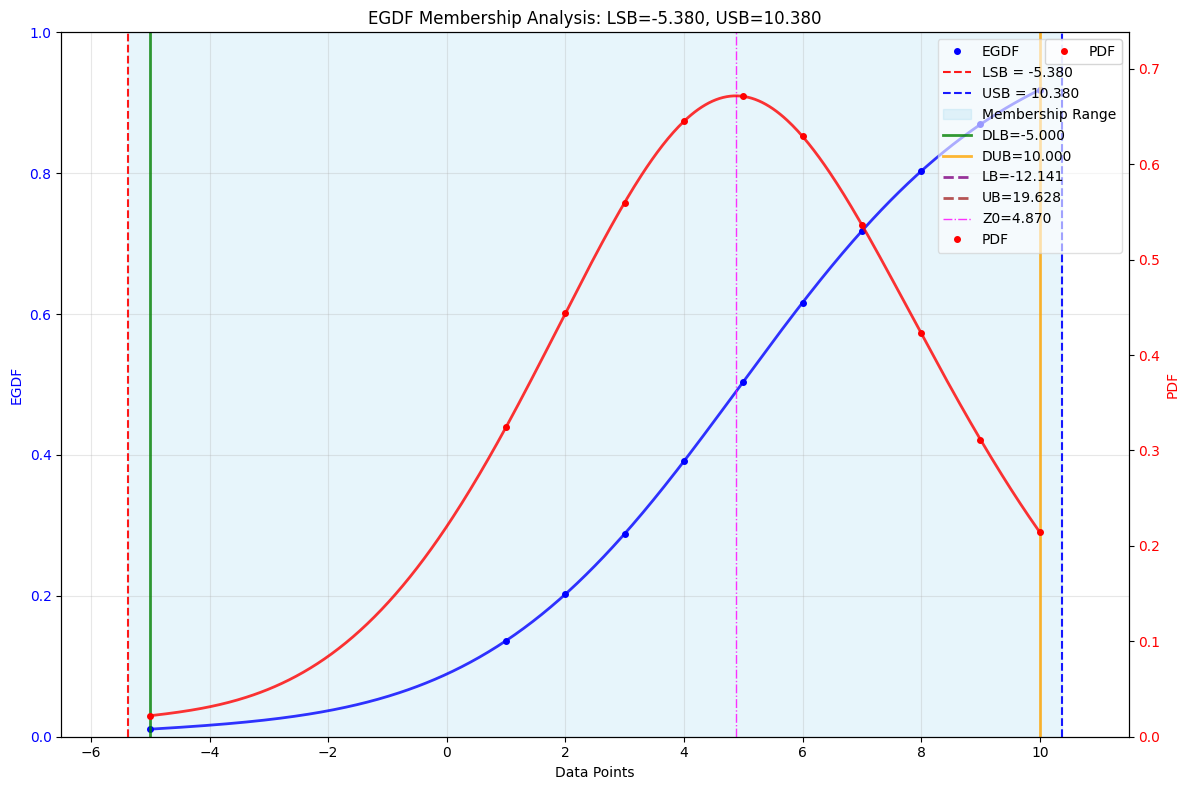

Lower and Upper Sample Bounds to check Data Membership: LSB: -5.380250168488737, USB: 10.38025016848874
Data Points within Bounds: [-5  1  2  3  4  5  6  7  8  9 10]


In [1]:
# import
import numpy as np
from machinegnostics.magcal import DataMembership, EGDF

# Example data
data = np.array([-5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# create a EGDF object
egdf = EGDF(verbose=False)
# fit the data
egdf.fit(data=data)

# create a DataMembership object
dm = DataMembership(gdf=egdf, verbose=False)
# fit the data
lsb, usb = dm.fit()

dm.plot()

print(f"Lower and Upper Sample Bounds to check Data Membership: LSB: {lsb}, USB: {usb}")
print(f"Data Points within Bounds: {data[(data >= lsb) & (data <= usb)]}")